<a href="https://colab.research.google.com/github/Raiyankhan640/Khan_Raiyan_Ibne_Reza_2221236042_CSE445/blob/main/mini_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("/dataframe.csv")
X = df.drop(columns=['Cluster'])
y = df['Cluster']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [27]:
def build_model(hp):
    model = keras.Sequential()

    # First layer (input layer + first hidden layer)
    model.add(layers.Dense(
        units=hp.Int('units_0', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    for i in range(hp.Int('num_layers', 1, 3)):
      model.add(layers.Dense(
        units=hp.Int(f'units_{i+1}', min_value=32, max_value=256, step=32),
        activation='relu'
      ))
    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

    model.compile(
    optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    return model


In [28]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='mini project',
    project_name='mini_project_2'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 28s


In [29]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6698 - val_accuracy: 1.0000 - val_loss: 0.6625
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.6678 - val_accuracy: 1.0000 - val_loss: 0.6606
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.6659 - val_accuracy: 1.0000 - val_loss: 0.6587
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.6639 - val_accuracy: 1.0000 - val_loss: 0.6568
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.6620 - val_accuracy: 1.0000 - val_loss: 0.6550
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.6600 - val_accuracy: 1.0000 - val_loss: 0.6532
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.6581 - val_accuracy: 1.0000 - val_loss: 0.6514
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 0.6562 - val_accuracy: 1.0000 - val_loss: 0.6496
Epoch 9/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


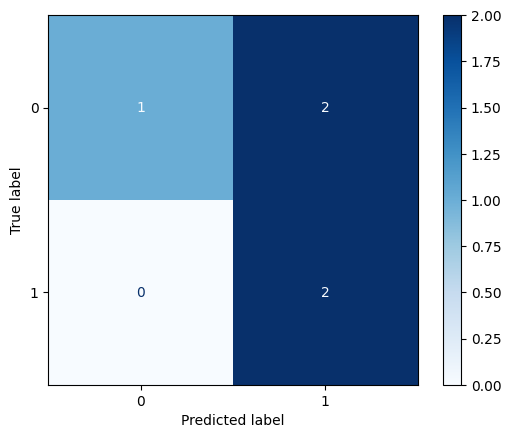

In [31]:
y_pred = np.argmax(best_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
